# Gromov-Wasserstein 

In [1]:
import seaborn as sns
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('./'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy


## Lecture d'arbres

In [2]:
g = { "a" : ["d"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c"],
      "e" : ["c"],
      "f" : []
    }


graph = Graph(g)

print("Vertices of graph:")
print(graph.nodes())

print("Edges of graph:")
print(graph.edges())

print("Add vertex:")
graph.add_vertex("z")

print("Vertices of graph:")
print(graph.nodes())

print("Add an edge:")
graph.add_edge({"a","z"})

print("Vertices of graph:")
print(graph.nodes())

print("Edges of graph:")
print(graph.edges())

print('Adding an edge {"x","y"} with new vertices:')
graph.add_edge({"x","y"})
print("Vertices of graph:")
print(graph.nodes())
print("Edges of graph:")
print(graph.edges())

Vertices of graph:
['b', 'a', 'd', 'f', 'e', 'c']
Edges of graph:
[{'b', 'c'}, {'a', 'd'}, {'c', 'd'}, {'e', 'c'}, {'c'}]
Add vertex:
Vertices of graph:
['b', 'a', 'd', 'f', 'e', 'c', 'z']
Add an edge:
Vertices of graph:
['b', 'a', 'd', 'f', 'e', 'c', 'z']
Edges of graph:
[{'b', 'c'}, {'a', 'd'}, {'a', 'z'}, {'c', 'd'}, {'e', 'c'}, {'c'}]
Adding an edge {"x","y"} with new vertices:
Vertices of graph:
['b', 'a', 'd', 'f', 'e', 'y', 'c', 'z']
Edges of graph:
[{'b', 'c'}, {'a', 'd'}, {'a', 'z'}, {'c', 'd'}, {'e', 'c'}, {'y', 'x'}, {'c'}]


## Function on graph

In [3]:
g = { "a" : ["d"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c","d"],
      "e" : ["c"],
      "f" : []
    }

g = { 1: [4],
      2 : [3],
      3 : [2, 3, 4, 5],
      4 : [1, 3,4],
      5 : [3],
    }

graph = Graph(g)

In [4]:
graph.edges()

[{1, 4}, {2, 3}, {3}, {3, 4}, {3, 5}, {4}]

In [5]:
graph.graph_dict

{1: [4], 2: [3], 3: [2, 3, 4, 5], 4: [1, 3, 4], 5: [3]}

In [6]:
graph.edges()

[{1, 4}, {2, 3}, {3}, {3, 4}, {3, 5}, {4}]

In [7]:
graph.find_all_paths(1,3)

[[1, 4, 3]]

In [8]:
graph.vertex_degree(3)

5

In [9]:
graph.vertex_degree(2)

1

In [10]:
graph.edges()

[{1, 4}, {2, 3}, {3}, {3, 4}, {3, 5}, {4}]

In [11]:
graph.nodes()

[1, 2, 3, 4, 5]

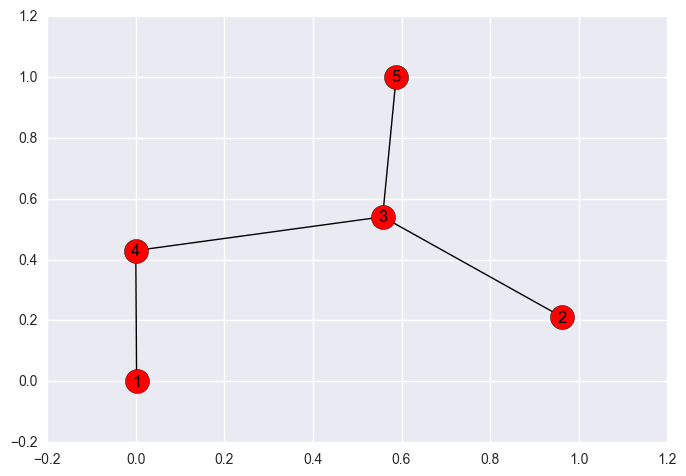

In [12]:
graph.add_nodes_and_edges_from_graph_dict()
graph.display_graph(graph.nx_graph)

In [13]:
graph.add_edge((2,1))
graph.add_edge((5,2))

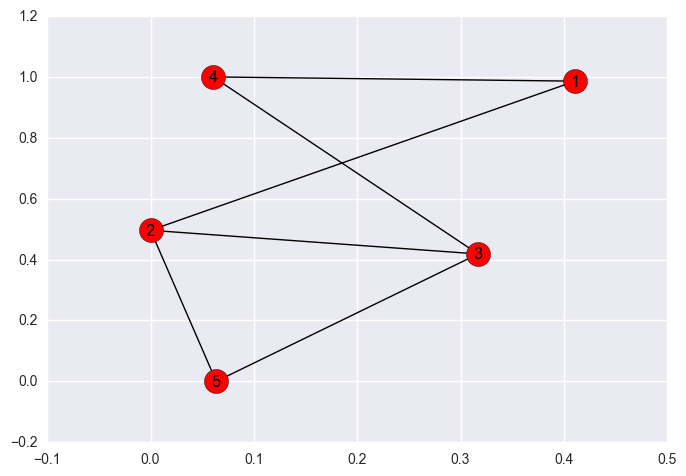

In [14]:
graph.add_nodes_and_edges_from_graph_dict()
graph.display_graph(graph.nx_graph)

In [15]:
graph.degree_sequence()

(5, 4, 2, 2, 1)

In [16]:
graph.smallest_path(graph.nx_graph,2,4)

[2, 1, 4]

In [17]:
graph.vertex_distance(graph.nx_graph,4,1)

1

In [18]:
graph.distance_matrix(graph.nx_graph)

array([[ 0.,  1.,  2.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  2.],
       [ 2.,  1.,  0.,  2.,  1.],
       [ 1.,  1.,  2.,  0.,  2.],
       [ 1.,  2.,  1.,  2.,  0.]])

## Add nodes attributes

In [19]:
attributes=[(1,2.232),(2,[1,2])]

In [20]:
graph.add_attibutes(attributes)

In [21]:
graph.nx_graph.node[1]

{'attr_name': 2.232}

In [22]:
[i for i in enumerate(['a','b','c'])]

[(0, 'a'), (1, 'b'), (2, 'c')]

# Construct Laetitia's trees

### Construire l'arbre à partir d'un xml

In [23]:
file_name='/Users/vayer/Documents/OT/Python/mercedData/agricultural/agricultural00.xml'

In [24]:
graph=Graph()
graph.build_Xml_tree(file_name,max_depth=2)

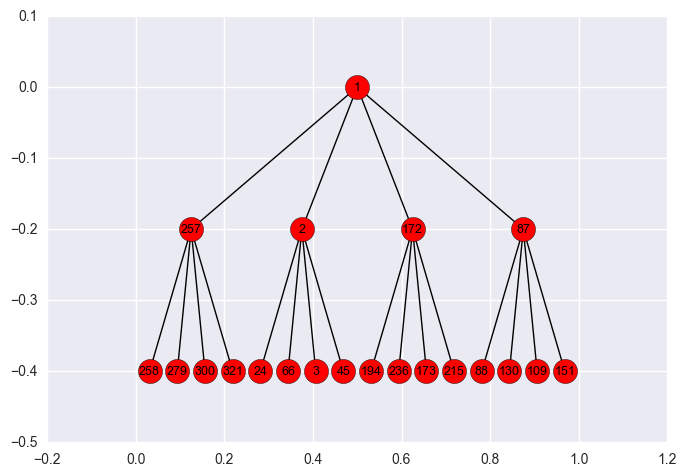

In [25]:
graph.display_graph(G=graph.G_plot,pos=graph.hierarchy_pos(G=graph.G_plot,root=1),node_size=300,font_size=9,figsize=(10,10))

# Transport optimal between two trees

In [26]:
import ot
import WGW_2 as wgw

In [27]:
file_name1='/Users/vayer/Documents/OT/Python/mercedData/agricultural/agricultural00.xml'
file_name2='/Users/vayer/Documents/OT/Python/mercedData/agricultural/agricultural81.xml'

In [28]:
graph1=Graph()
graph1.build_Xml_tree(file_name1,max_depth=3)
graph2=Graph()
graph2.build_Xml_tree(file_name2,max_depth=3)

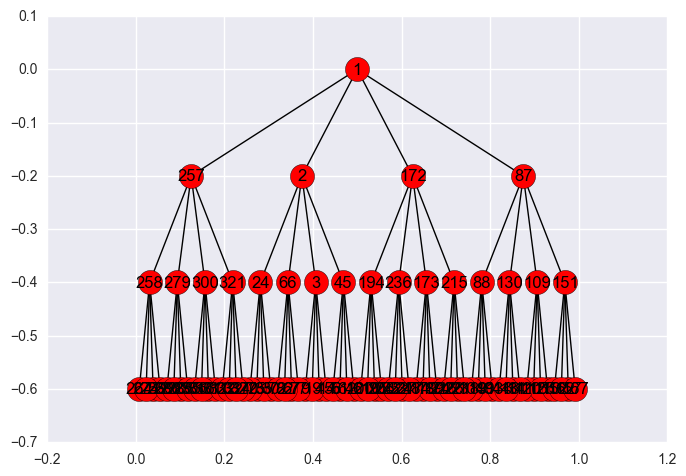

In [29]:
graph1.display_graph(G=graph1.G_plot,pos=graph1.hierarchy_pos(graph1.G_plot,1))

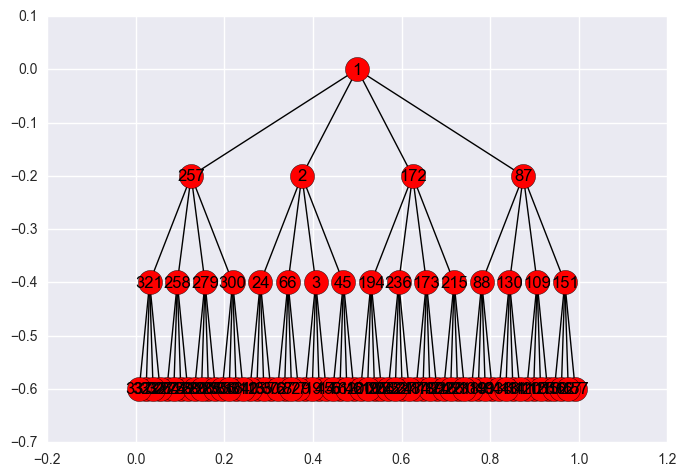

In [30]:
graph2.display_graph(G=graph2.G_plot,pos=graph2.hierarchy_pos(graph2.G_plot,1))

## Compute distance for trees beetween attributes

In [33]:
import matplotlib.gridspec as gridspec

In [34]:
T1=nx.bfs_tree(graph1.G_plot, 1) #create trees
T2=nx.bfs_tree(graph2.G_plot, 1)

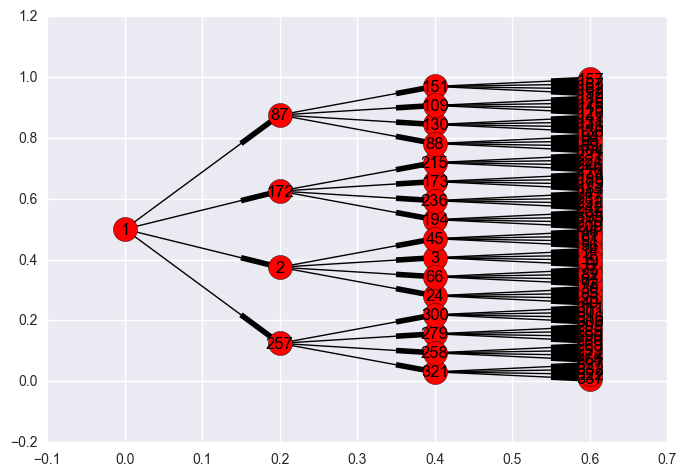

In [35]:
nx.draw_networkx(T2,pos=graph2.hierarchy_pos(graph2.G_plot,1,rotate=True))
plt.show()

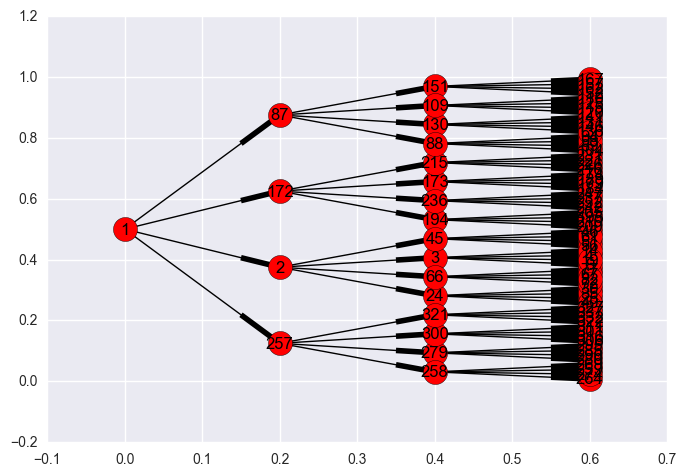

In [36]:
nx.draw_networkx(T1,pos=graph1.hierarchy_pos(graph1.G_plot,1,rotate=True))
plt.show()

### Attributs des feuilles

In [37]:
leaves1=[x for x in T1.nodes_iter() if T1.out_degree(x)==0 and T1.in_degree(x)==1]
leaves2=[x for x in T2.nodes_iter() if T2.out_degree(x)==0 and T2.in_degree(x)==1]
d1=dict((k, v) for k, v in graph1.G_plot.node.items() if k in set(leaves1))
d2=dict((k, v) for k, v in graph2.G_plot.node.items() if k in set(leaves2))

In [38]:
x1=[]
for k,v in d1.items():
    #x1=np.concatenate((x1,b['attr_name']))
    x1.append(v['attr_name'])

In [39]:
x2=[]
for k,v in d2.items():
    #x1=np.concatenate((x1,b['attr_name']))
    x2.append(v['attr_name'])

In [40]:
x1=np.array(x1)
x2=np.array(x2)

### Ground Metric

In [69]:
M=ot.dist(x1,x2)
M= M/np.max(M)

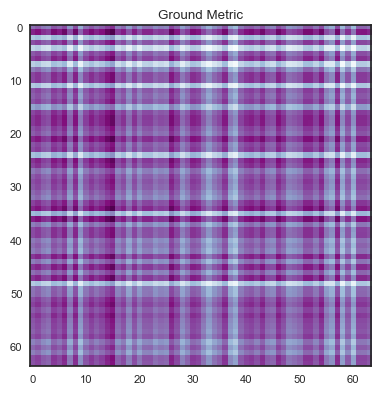

In [70]:
plt.imshow(M, cmap=plt.cm.BuPu,interpolation='nearest')
plt.title("Ground Metric")
plt.show()

### Costs matrix between leaves (both the same)

In [65]:
C1=graph1.distance_matrix(graph1.G_plot,nodeOfInterest=leaves1)
C2=graph2.distance_matrix(graph2.G_plot,nodeOfInterest=leaves2)

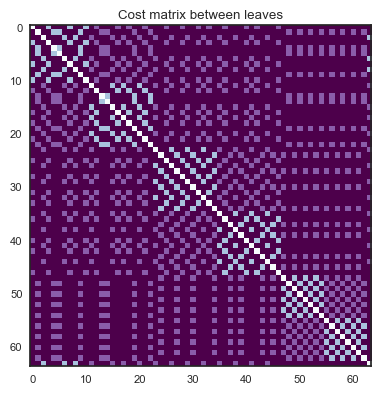

In [67]:
plt.imshow(C1, cmap=plt.cm.BuPu,interpolation='nearest')
plt.title("Cost matrix between leaves")
plt.show()

### Weights

In [72]:
t1masses = np.ones(len(leaves1))/len(leaves1)
t2masses = np.ones(len(leaves2))/len(leaves2)

### Classical transport

In [73]:
transp = ot.emd(t1masses,t2masses, M)

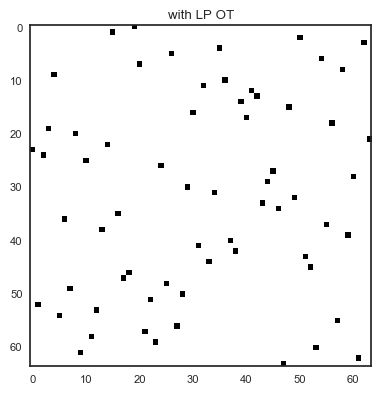

In [74]:
plt.imshow(transp, cmap=plt.cm.Greys,interpolation='nearest')
plt.title("with LP OT")
plt.show()

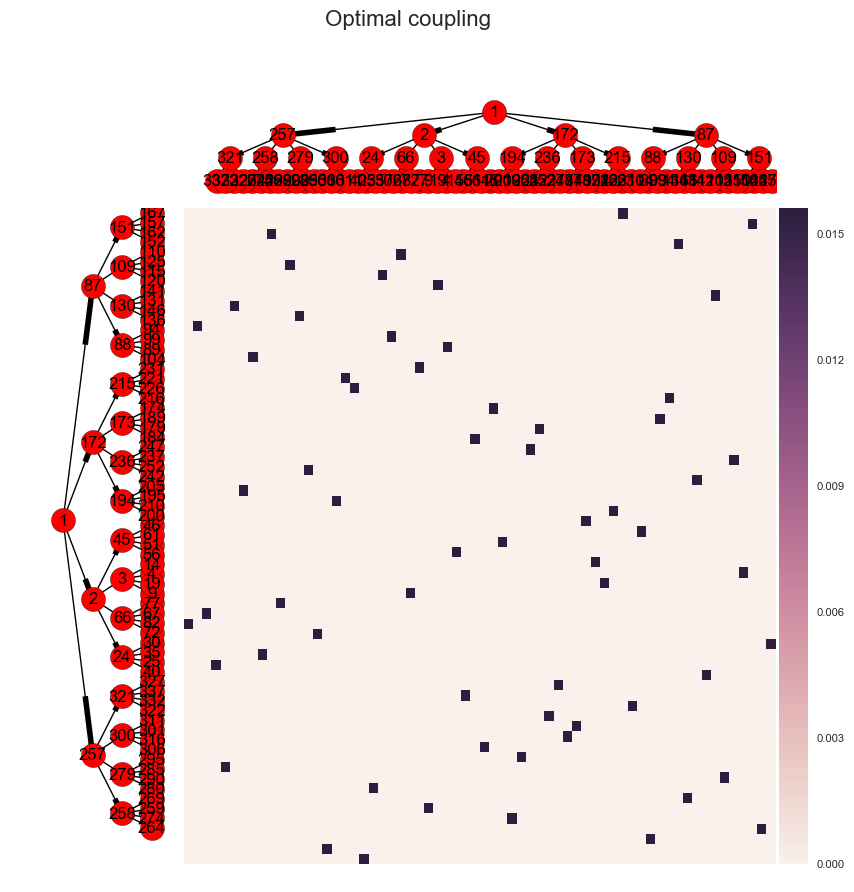

In [75]:
sns.set_context("paper")
f = plt.figure(figsize=(10, 10))

gs = gridspec.GridSpec(2, 3, width_ratios=[1,4,0.2], height_ratios=[0.7,4])
gs.update(wspace=0.01, hspace=0.01)

ax2 = plt.subplot(gs[1])
sns.set_style('white')
ax2.axis('off')
plt.xlim( -0.05,1 )
nx.draw_networkx(T2,pos=graph2.hierarchy_pos(graph2.G_plot,1))
ax3 = plt.subplot(gs[3])
plt.ylim( -0.05,1 )
nx.draw_networkx(T1,pos=graph1.hierarchy_pos(graph1.G_plot,1,rotate=True))
ax3.axis('off')
ax5 = plt.subplot(gs[5])
ax4 = plt.subplot(gs[4])
sns.heatmap(np.flipud(transp),annot=True,fmt='.2f',cbar_ax=ax5,xticklabels=False,yticklabels=False)
f.suptitle('Optimal coupling', fontsize=16)
plt.show()

### Gromov transport

On veut trouver les paramètres alpha et epsilon qui entraine un transport qui prend en compte la structure. Le critère qu'on se donne est que les feuilles qui font partie du même noeud doivent être transportées au même endroit. Aussi la somme par block de 4 doit être la plus proche de 4. On appelle distance au transport structuré "parfait" le nombre de blocks de 4 dont la somme est égale à 4.
On compute aussi le cout (qui est la valeur de la distance de gromov wasser)

In [76]:
alphas=np.linspace(0,700,30)
epsilons= np.linspace(0.01,20,50)

In [77]:
i=0
j=0
dist=np.zeros(shape=(len(epsilons),len(alphas)))
cout=np.zeros(shape=(len(epsilons),len(alphas)))
for epsilon in epsilons:
    for alpha in alphas:
        transpwgw= wgw.wgw(M,C1,C2,t1masses,t2masses, 'square_loss',epsilon,alpha,max_iter=500,verbose=False,log=False)
        #dist[i,j]=np.sum((transpwgw-np.diag(transpwgw))<1.e-5)-transpwgw.shape[0] # nombre d'éléments nuls en dehors de la diagonale
        #cout[i,j]=np.sum(M+alpha*wgw.tensor_square_loss(C1,C2,transpwgw)+epsilon*np.nan_to_num(transpwgw*np.log(transpwgw))-transpwgw)
        transpwgw[transpwgw<1e-5]=0 #en dessous on considère le transport comme négligeable
        cout[i,j]=np.sum(transpwgw*M)
        dist[i,j]=np.sum(np.count_nonzero(utils.blockshaped(transpwgw,4,4),axis=1).sum(1)==4)
        j=j+1
    j=0
    i=i+1

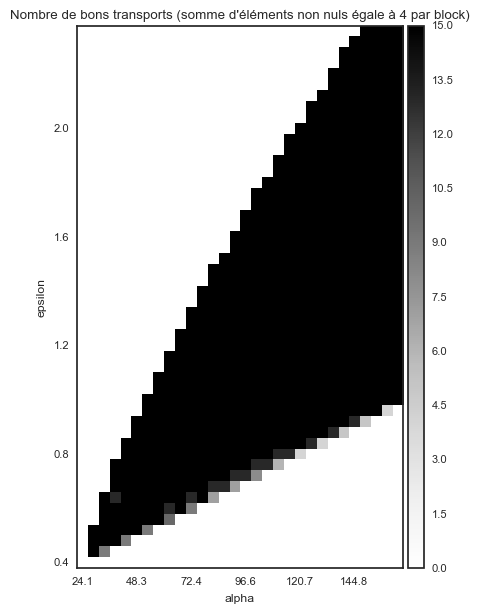

In [78]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.figure(figsize=(5,7))
sns.set_context("paper")
ax = plt.gca()
im =plt.imshow(dist,interpolation='nearest')
plt.title("Nombre de bons transports (somme d'éléments non nuls égale à 4 par block)")
plt.xlabel('alpha')
plt.ylabel('epsilon')
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_xticklabels([ '%.1f' % elem for elem in alphas ])
ax.set_yticklabels([ '%.1f' % elem for elem in epsilons ])
#ax.set_xticklabels(alphas)
#ax.set_yticklabels(epsilons)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

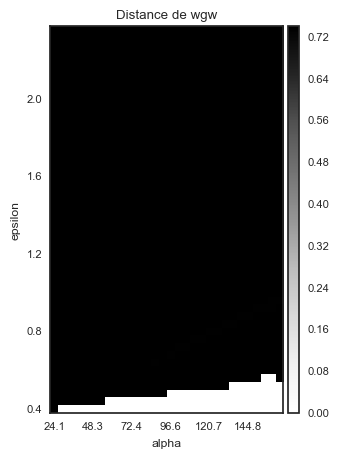

In [79]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.figure(figsize=(10,5))
sns.set_context("paper")
ax = plt.gca()
im =plt.imshow(cout,interpolation='nearest')
plt.title("Distance de wgw")
plt.xlabel('alpha')
plt.ylabel('epsilon')
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_xticklabels([ '%.1f' % elem for elem in alphas ])
ax.set_yticklabels([ '%.1f' % elem for elem in epsilons ])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

In [80]:
indices_max = np.where(dist == dist.max())
indices_min_dist = np.where(cout == cout.min())

In [81]:
#alpha = alphas[indices_max[0][0]]
#epsilon=epsilons[indices_max[1][0]]
alpha = alphas[10]
epsilon=epsilons[13]

ot.tic()
transpwgw= wgw.wgw(M,C1,C2,t1masses,t2masses,'square_loss',epsilon,alpha,max_iter=500,verbose=False,log=False)
ot.toc()

Elapsed time : 0.017367839813232422 s


0.017367839813232422

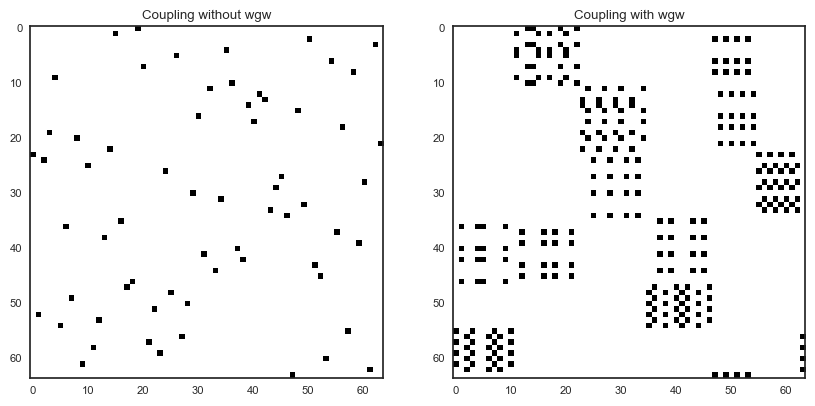

In [82]:
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(transp, cmap=plt.cm.Greys,interpolation='nearest')
plt.title("Coupling without wgw")
plt.subplot(122)
plt.imshow(transpwgw, cmap=plt.cm.Greys,interpolation='nearest')
plt.title("Coupling with wgw")
plt.show()

In [83]:
transpwgw2=transpwgw
transpwgw2[transpwgw2<1e-7]=0
np.sum(np.count_nonzero(utils.blockshaped(transpwgw2,4,4),axis=1).sum(1)==4)

15

In [84]:
np.sum(np.count_nonzero(utils.blockshaped(transp,4,4),axis=1).sum(1)==4)

0

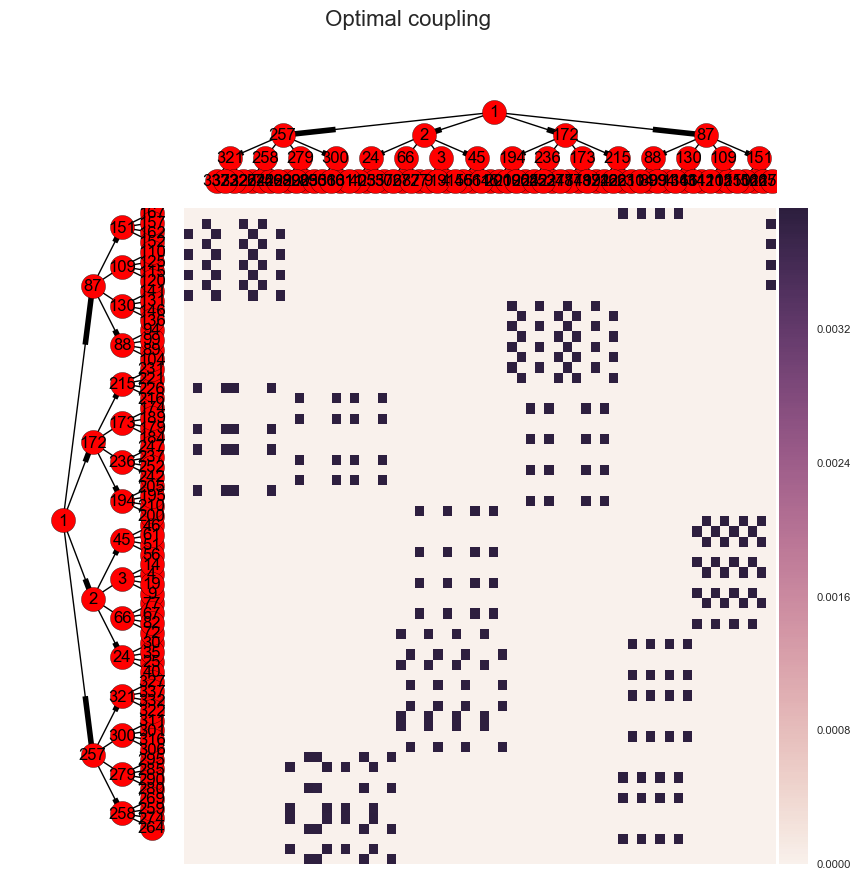

In [85]:
sns.set_context("paper")
f = plt.figure(figsize=(10, 10))

gs = gridspec.GridSpec(2, 3, width_ratios=[1,4,0.2], height_ratios=[0.7,4])
gs.update(wspace=0.01, hspace=0.01)

ax2 = plt.subplot(gs[1])
sns.set_style('white')
ax2.axis('off')
plt.xlim( -0.05,1 )
nx.draw_networkx(T2,pos=graph2.hierarchy_pos(graph2.G_plot,1),flip=True)
ax3 = plt.subplot(gs[3])
plt.ylim( -0.05,1 )
nx.draw_networkx(T1,pos=graph1.hierarchy_pos(graph1.G_plot,1,rotate=True))
ax3.axis('off')
ax5 = plt.subplot(gs[5])
ax4 = plt.subplot(gs[4])
sns.heatmap(np.flipud(transpwgw),annot=True,fmt='.2f',cbar_ax=ax5,xticklabels=False,yticklabels=False)
f.suptitle('Optimal coupling', fontsize=16)
plt.show()

In [132]:
np.sum(transp*M)

0.73864299101093978

In [133]:
np.sum(transpwgw*M)

0.74176236266288853

### Time series

In [51]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.spatial.distance import cdist
import scipy.stats as stat

import ot
import WGW_2 as wgw

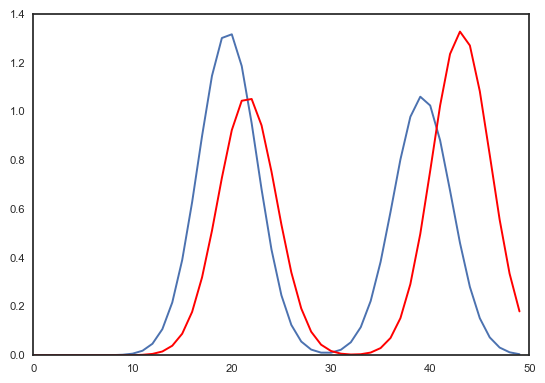

In [52]:
#%%
#generate 2 time series. The second one is more or less (there is a small dilation) a translation of the first one.
x = np.linspace(-2,3,50)
#ts1 = stat.norm.pdf(x, scale=0.3) + 0.8*stat.norm.pdf(x, loc=2, scale=0.3)
ts1 = stat.norm.pdf(x, scale=0.3) + 0.8*stat.norm.pdf(x, loc=2, scale=0.3)
pl.plot(ts1)
#ts2 = stat.norm.pdf(x, loc = 0.2, scale=0.3) + 0.8*stat.norm.pdf(x, loc=2.4, scale=0.3)
ts2 = stat.norm.pdf(x, loc = 2.4, scale=0.3) + 0.8*stat.norm.pdf(x, loc=0.2, scale=0.3)
pl.plot(ts2, '-r')
pl.show()





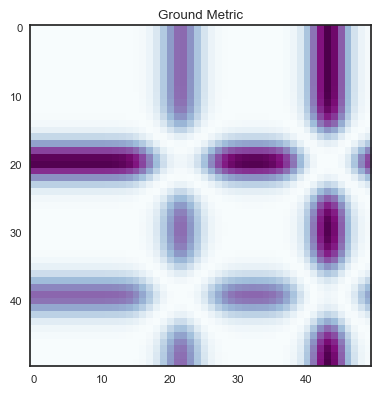

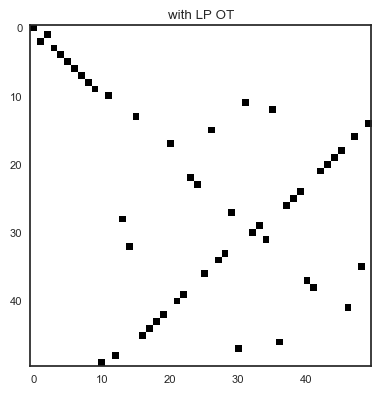

In [53]:
#%%
#Simple OT based distance between the two series

M = ot.dist(ts1.reshape(-1,1),ts2.reshape(-1,1),'sqeuclidean')
M= M/np.max(M)

pl.imshow(M, cmap=pl.cm.BuPu,interpolation='nearest')
pl.title("Ground Metric")
pl.show()

ts_masses = np.ones(len(ts1))/len(ts1)
transp = ot.emd(ts_masses,ts_masses, M)

pl.imshow(transp, cmap=pl.cm.Greys,interpolation='nearest')
pl.title("with LP OT")
pl.show()

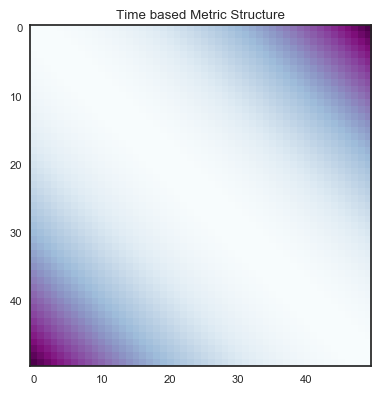

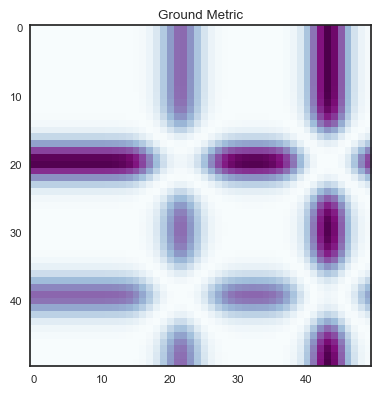

In [54]:
#%% Wasserstein Gromov-Wasserstein distance measure

G = ot.dist(x.reshape(-1,1),x.reshape(-1,1),'sqeuclidean')
G = G/np.max(G)
#for i in range(G.shape[0]):
#    G[i,:i]=2#np.Infinity

pl.imshow(G, cmap=pl.cm.BuPu,interpolation='nearest')
pl.title("Time based Metric Structure")
pl.show()

#for i in range(M.shape[0]):
#    M[i,:i]=np.Infinity
pl.imshow(M, cmap=pl.cm.BuPu,interpolation='nearest')
pl.title("Ground Metric")
pl.show()


    2|1.736904e-02|
    3|1.196189e-04|
    4|1.573541e-07|
    5|9.596743e-12|
Elapsed time : 0.026233911514282227 s


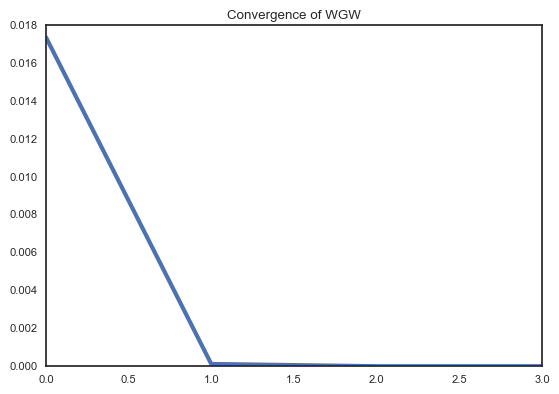

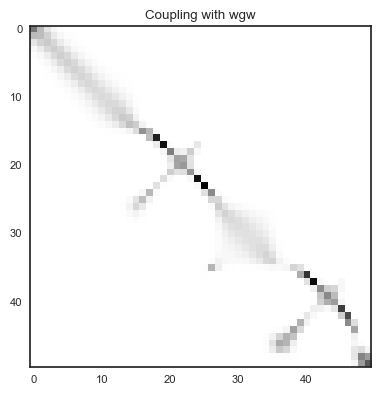

In [55]:
alpha = 8
epsilon=1e-2

ot.tic()
transp,log = wgw.wgw(M,G,G,ts_masses,ts_masses, 'square_loss',epsilon,alpha,
                     max_iter=100,verbose=True,log=True)
ot.toc()

pl.plot(log['err'],'',lw=3)
pl.title("Convergence of WGW")
pl.show()

pl.imshow(transp, cmap=pl.cm.Greys,interpolation='nearest')
pl.title("Coupling with wgw")
pl.show()


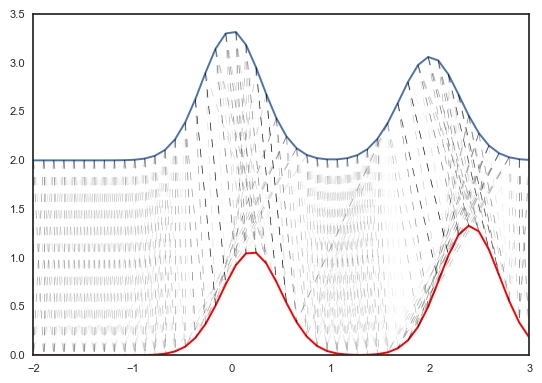

In [56]:
#%%
pl.plot(x, ts1+2)
pl.plot(x, ts2, '-r')
max_t=transp.max()
for i in range(len(ts1)):
    for j in range(len(ts2)):
        if (transp[i,j]>0):
            pl.plot([x[i], x[j]], [ts1[i]+2, ts2[j]], 'k--', linewidth=0.5,alpha=transp[i,j]/max_t)
pl.show()